<a href="https://colab.research.google.com/github/sanheensethi/gndcteam/blob/master/PlantDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Downloading Dataset
!git clone https://github.com/spMohanty/PlantVillage-Dataset

Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 163229, done.
remote: Total 163229 (delta 0), reused 0 (delta 0), pack-reused 163229
Receiving objects: 100% (163229/163229), 2.00 GiB | 19.98 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Checking out files: 100% (182401/182401), done.


In [ ]:
#copy the data
!cp -R /content/PlantVillage-Dataset/raw /content/

In [ ]:
#for removing any folder
!rm -r /content/Test

rm: cannot remove '/content/Test': No such file or directory


In [ ]:
#Inserting Libraries
import numpy as np
import random
import shutil
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
 def TestFileFolderCreate() :   
    randomFolder = random.randint(0,len(root_dir))
    folderName = root_dir[randomFolder]
    print(folderName)
    imageList = listdir(f"{directory_root}/{folderName}")
    randomImageNum = random.randint(0,len(imageList))
    ImageName = imageList[randomImageNum]
    print(ImageName)
    WriteFile(folderName,ImageName)
    src = f"{directory_root}/{folderName}/{ImageName}"
    des = '/content/Test/'
    shutil.move(src,des)

In [ ]:
#Initializing Variables
EPOCHS = 25
INIT_LR = 1e-4
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root = '/content/raw/color'
width=256
height=256
depth=3

In [ ]:
root_dir = listdir(directory_root)
print("Number Of Folders : " + str(len(root_dir)))

Number Of Folders : 38


In [ ]:
!mkdir Test

In [ ]:
def WriteFile(ClassName,ImageName):
    f = open("TestFile.csv","a+")
    f.write(ClassName+"@#"+ImageName+"\n")

In [ ]:
for i in range(0,10):
    print(i)
    TestFileFolderCreate()

0
Tomato___Tomato_mosaic_virus
78c968a3-8083-4924-b351-3f36569cf33a___PSU_CG 2214.JPG
1
Cherry_(including_sour)___Powdery_mildew
9d879873-2f64-473a-8c76-72ad55131402___FREC_Pwd.M 4800.JPG
2
Tomato___Early_blight
c5ab9d87-f1bf-4fce-8133-c80ac2d52dd5___RS_Erly.B 7849.JPG
3
Soybean___healthy
83714953-4eba-4075-898a-b215d86a3989___RS_HL 5616.JPG
4
Grape___healthy
e17f9151-51a0-417d-a7c6-9ad9a2cce0d9___Mt.N.V_HL 9053.JPG
5
Tomato___Spider_mites Two-spotted_spider_mite
fbac63f2-cfbc-4c5c-a623-e40b1314fc83___Com.G_SpM_FL 8784.JPG
6
Corn_(maize)___Northern_Leaf_Blight
a3b588f0-1c34-4a1e-ad47-c2202a896173___RS_NLB 3834.JPG
7
Pepper,_bell___healthy
b06117a8-6ca6-4b82-96cf-07604beb8f1b___JR_HL 5906.JPG
8
Corn_(maize)___healthy
867d1311-1976-4387-8fb0-28c9ce135f0b___R.S_HL 0595 copy.jpg
9
Apple___Black_rot
6941b868-48df-4f58-9b34-4bc9d9e82867___JR_FrgE.S 8668.JPG


[INFO] Loading Data 
[IMAGES] Images : 5089
[IMAGES] Images : 513
[IMAGES] Images : 984
[IMAGES] Images : 5357
[IMAGES] Images : 1076
[IMAGES] Images : 952
[IMAGES] Images : 1502
[IMAGES] Images : 1000
[IMAGES] Images : 2297
[IMAGES] Images : 854
[IMAGES] Images : 1192
[IMAGES] Images : 630
[IMAGES] Images : 422
[IMAGES] Images : 1180
[IMAGES] Images : 1000
[IMAGES] Images : 1675
[IMAGES] Images : 1051
[IMAGES] Images : 456
[IMAGES] Images : 1161
[IMAGES] Images : 152
[IMAGES] Images : 371
[IMAGES] Images : 1835
[IMAGES] Images : 275
[IMAGES] Images : 1109
[IMAGES] Images : 360
[IMAGES] Images : 997
[IMAGES] Images : 620
[IMAGES] Images : 5507
[IMAGES] Images : 372
[IMAGES] Images : 1477
[IMAGES] Images : 1645
[IMAGES] Images : 2127
[IMAGES] Images : 1771
[IMAGES] Images : 1909
[IMAGES] Images : 1383
[IMAGES] Images : 1404
[IMAGES] Images : 1591
[IMAGES] Images : 999
Total Images : 54295


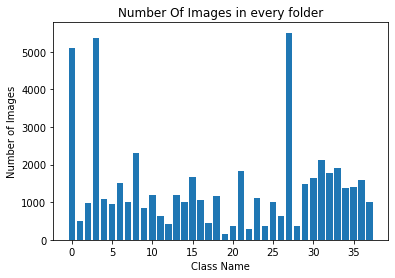

In [ ]:
#Viewing Number of Images in Folder
 
class my_dictionary(dict): 
 
  
 
    # __init__ function 
 
    def __init__(self): 
 
        self = dict() 
 
          
 
    # Function to add key:value 
 
    def add(self, key, value): 
 
        self[key] = value 
 
print("[INFO] Loading Data ")
root_dir = listdir(directory_root)
sumP = 0
Y = []
 
dict_obj = my_dictionary()
j=0
for directory in root_dir :
    #print("[FOLDER] Loading Folder : "+str(directory))
    plant_disease_image_list = listdir(f"{directory_root}/{directory}")
    lenP = len(plant_disease_image_list)
    Y.append (lenP)
    dict_obj.add(j,lenP)
    j=j+1
    print("[IMAGES] Images : " + str(lenP))
    sumP += lenP
   
print("Total Images : " + str(sumP))
 
#BarGraph
plt.bar(range(0,len(root_dir)),Y)
plt.xlabel("Class Name")
plt.ylabel("Number of Images")
plt.title("Number Of Images in every folder")
plt.show()

In [ ]:
print(dict_obj) 
import math
 
def create_class_weight(labels_dict,mu=0.15):
    total = np.sum(labels_dict.values())
    keys = labels_dict.keys()
    class_weight = dict()
 
    for key in keys:
        score = math.log(mu*total/float(labels_dict[key]))
        class_weight[key] = score if score > 1.0 else 1.0
 
    return class_weight
 
# random labels_dict
 
sh = create_class_weight(dict_obj)
print(sh)

{0: 5090, 1: 513, 2: 984, 3: 5357, 4: 1076, 5: 952, 6: 1502, 7: 1000, 8: 2297, 9: 854, 10: 1191, 11: 630, 12: 423, 13: 1180, 14: 1000, 15: 1676, 16: 1052, 17: 456, 18: 1162, 19: 152, 20: 371, 21: 1834, 22: 275, 23: 1107, 24: 359, 25: 997, 26: 621, 27: 5506, 28: 372, 29: 1478, 30: 1645, 31: 2127, 32: 1770, 33: 1909, 34: 1383, 35: 1404, 36: 1590, 37: 1000}


TypeError: ignored

In [ ]:
dataGeneration = ImageDataGenerator(validation_split=0.2,rescale=1./255,rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [ ]:
trainGenerator = dataGeneration.flow_from_directory(
        '/content/raw/color/',
        target_size=(256,256),
        batch_size=64,
        class_mode='categorical',
        shuffle=True,
        subset='training')
print(trainGenerator)
classes = trainGenerator.class_indices

Found 43449 images belonging to 38 classes.


In [ ]:
def ClassesLabel(classes):
    j=0
    for i in classes :
        f = open("Classes.csv","a+")
        f.write(str(j)+"@#"+i+"\n")
        j = j+1

In [ ]:
ClassesLabel(classes)

In [ ]:
 validGenerator = dataGeneration.flow_from_directory(
        '/content/raw/color/',
        target_size=(256,256),
        batch_size=64,
        class_mode='categorical',
        shuffle=True,
        subset='validation')

Found 10846 images belonging to 38 classes.


In [ ]:
model = Sequential()

In [ ]:
inputShape = (256,256,3)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
n_classes = 38
from keras.regularizers import l2

In [ ]:
model.add(Conv2D(32, (3, 3), padding="same",name="conv_1",kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.20))
model.add(Conv2D(64, (3, 3),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.30))
model.add(Conv2D(128, (3, 3),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.40))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

In [ ]:
 model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 85, 85, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 85, 85, 64)       

In [ ]:
!mkdir Weights

In [ ]:
 opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
# train the network
print("[INFO] training network...")
from keras.callbacks import ModelCheckpoint
 
filepath="/content/Weights/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

[INFO] training network...


In [ ]:
 history = model.fit_generator(
    trainGenerator,steps_per_epoch = 43448//64,epochs = 2,callbacks=callbacks_list,validation_data = validGenerator,verbose=1,shuffle=True,class_weight='auto')

Epoch 1/2
678/678 [==============================] - 1028s 2s/step - loss: 3.8928 - accuracy: 0.7058 - val_loss: 7.1537 - val_accuracy: 0.4131

Epoch 00001: val_accuracy improved from -inf to 0.41315, saving model to /content/Weights/weights-improvement-01-0.41.hdf5
Epoch 2/2
678/678 [==============================] - 1041s 2s/step - loss: 2.8666 - accuracy: 0.8218 - val_loss: 3.8445 - val_accuracy: 0.6301

Epoch 00002: val_accuracy improved from 0.41315 to 0.63009, saving model to /content/Weights/weights-improvement-02-0.63.hdf5


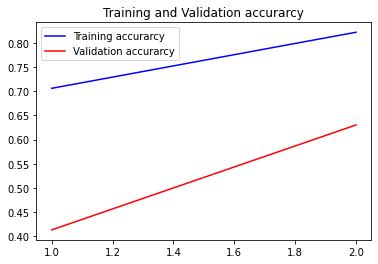

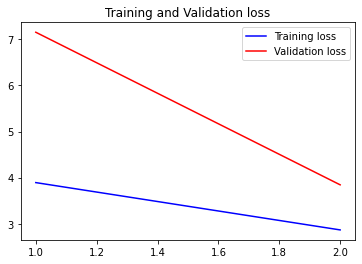

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()
 
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
 print("[INFO] Calculating model accuracy")
scores = model.evaluate(validGenerator)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
170/170 [==============================] - 175s 1s/step
Test Accuracy: 95.3346848487854


In [ ]:
 print("[INFO] Saving model...")
model.save("disease2Later.h5")

[INFO] Saving model...


In [ ]:
from keras.models import load_model
model2 = load_model("disease2Later.h5")

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 85, 85, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 85, 85, 64)       

In [ ]:
  opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model2.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

In [ ]:
  validGenerator2 = dataGeneration.flow_from_directory(
        '/content/Test',
        target_size=(256,256),
        class_mode='categorical',
        shuffle=True,
        subset='validation')

Found 0 images belonging to 0 classes.


In [ ]:
 print("[INFO] Calculating model accuracy")
scores = model2.evaluate(validGenerator)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
170/170 [==============================] - 179s 1s/step
Test Accuracy: 63.01862597465515


In [ ]:
imagePath = listdir('/content/Test')

In [ ]:
for image in imagePath:
    print("[IMAGE] : "+str(image))
    path = '/content/Test/'+image
    img = cv2.imread(path)
    img = cv2.resize(img,(256,256))
 
    img = np.reshape(img,[1,256,256,3])
    img = img/255
    cl = model.predict_classes(img)
    print("[CLASS] : "+str(cl[0]))

[IMAGE] : 83714953-4eba-4075-898a-b215d86a3989___RS_HL 5616.JPG
[CLASS] : 24
[IMAGE] : 9d879873-2f64-473a-8c76-72ad55131402___FREC_Pwd.M 4800.JPG
[CLASS] : 31
[IMAGE] : 78c968a3-8083-4924-b351-3f36569cf33a___PSU_CG 2214.JPG
[CLASS] : 36
[IMAGE] : b06117a8-6ca6-4b82-96cf-07604beb8f1b___JR_HL 5906.JPG
[CLASS] : 24
[IMAGE] : c5ab9d87-f1bf-4fce-8133-c80ac2d52dd5___RS_Erly.B 7849.JPG
[CLASS] : 37
[IMAGE] : 867d1311-1976-4387-8fb0-28c9ce135f0b___R.S_HL 0595 copy.jpg
[CLASS] : 24
[IMAGE] : a3b588f0-1c34-4a1e-ad47-c2202a896173___RS_NLB 3834.JPG
[CLASS] : 24
[IMAGE] : 6941b868-48df-4f58-9b34-4bc9d9e82867___JR_FrgE.S 8668.JPG
[CLASS] : 24
[IMAGE] : fbac63f2-cfbc-4c5c-a623-e40b1314fc83___Com.G_SpM_FL 8784.JPG
[CLASS] : 24
[IMAGE] : e17f9151-51a0-417d-a7c6-9ad9a2cce0d9___Mt.N.V_HL 9053.JPG
[CLASS] : 32


In [ ]:
import pandas as pd